民主党のオバマ候補と、共和党のロムニー候補の争いで、オバマ候補が勝利しました。
最初は、世論調査結果のデータを扱います。以下のような問題を設定してみましょう。

1.) どのような人達が調査対象だったか？

2.) 調査結果は、どちらの候補の有利を示しているか？

3.) 態度未定の人達が世論調査に与えた影響は？

4.) また、態度未定の人たちの動向は？

5.) 投票者の気持ちは、時間ともにどう変化したか？

6.) 討論会の影響を世論調査の結果から読み取ることができるか？

In [3]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
%matplotlib inline

In [6]:
#webからデータを取得するためにrequestsをインポート
import requests

#CSVとして扱うためにStringIOを使う
from io import StringIO

In [5]:
# データのURLです。
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# requestsをつかってデータをtextとして取得します。
source = requests.get(url).text

# StringIOを使ってpandasのエラーを防ぎます。
poll_data = StringIO(source) 

In [6]:
poll_df = pd.read_csv(poll_data)

In [7]:
#世論調査の結果データ
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [8]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [14]:
#世論調査の主体とその支持政党を見る
poll_df[['Pollster', 'Partisan', 'Affiliation']].sort_values('Pollster').drop_duplicates()

,Pollster,Partisan,Affiliation
404,ABC/Post,Nonpartisan,None
471,AP-GfK,Nonpartisan,None
90,ARG,Nonpartisan,None
132,Allstate/National Journal,Nonpartisan,None
305,Angus-Reid,Nonpartisan,None
122,Bloomberg,Nonpartisan,None
63,CBS,Nonpartisan,None
415,CBS/Times,Nonpartisan,None
504,CNN,Nonpartisan,None
568,Clarus,Nonpartisan,None


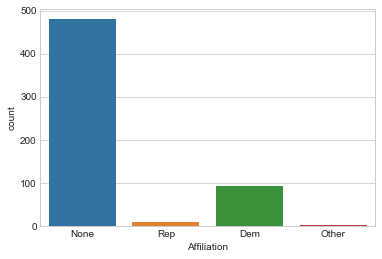

In [15]:
#affiliationで分類
sns.countplot('Affiliation', data=poll_df)

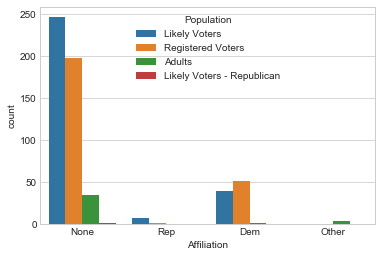

In [22]:
#調査主体の支持政党を、調査対象で層別化
sns.countplot('Affiliation', data=poll_df, hue='Population')

オバマ、ロムニー、未定の3つの選択肢について、それぞれ平均的な支持率を計算する

In [49]:
avg = pd.DataFrame(poll_df.mean())

In [50]:
avg

,0
Number of Observations,1296.679078
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [51]:
#不要な行を削除
avg = avg.loc[['Obama', 'Romney', 'Undecided']]

In [52]:
avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827


In [45]:
#標準偏差を計算
std = pd.DataFrame(poll_df.std())

In [46]:
std

,0
Number of Observations,1621.268369
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


In [47]:
#不要な行を削除
std = std.loc[['Obama', 'Romney', 'Undecided']]

In [48]:
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754


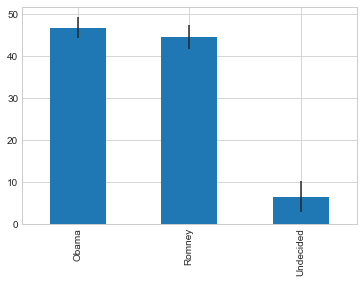

In [53]:
avg.plot(yerr=std, kind='bar', legend=False)

In [56]:
poll_avg = pd.concat([avg,std], axis=1)
poll_avg.columns = ['Average', 'STD']

In [57]:
poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


選挙戦の推移を見る。

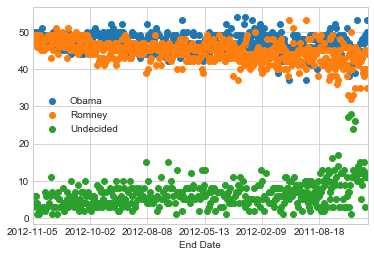

In [58]:
#両候補支持と態度未定の人の割合をプロット
poll_df.plot(x='End Date', y=['Obama', 'Romney', 'Undecided'], marker='o', linestyle='')

In [59]:
#時系列で並べるため、datetimeモジュールを使う
from datetime import datetime

In [65]:
#オバマとロムニーの支持率の差を計算し、新しい列に入れる
poll_df['Difference'] = (poll_df.Obama- poll_df.Romney)/100

In [66]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09,0.09


In [67]:
#支持率の差を時系列で見る。同じ期間に行われた調査をgroupbyでまとめる
#as_index=Falseにすると、indexを0,1,2の形で保持
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

In [68]:
poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09,0.09


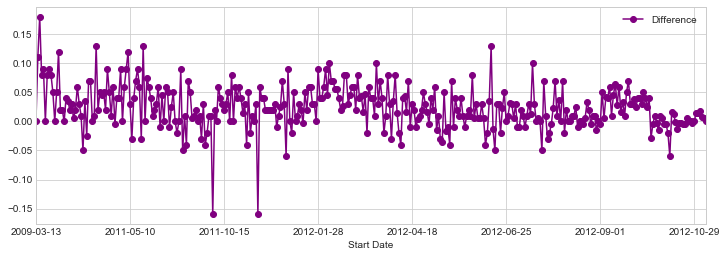

In [69]:
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple')

In [71]:
#討論会の日付を描き込む
#10月のデータだけ指定する
poll_df[poll_df['Start Date'].apply(lambda x:x.startswith('2012-10'))]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Differnce,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000,-0.005000


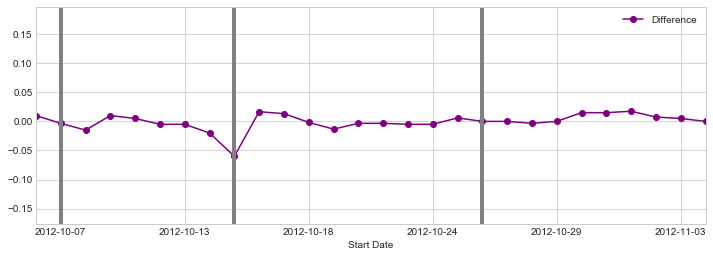

In [73]:
#10月だけのプロット
fig = poll_df.plot('Start Date', 'Difference', figsize=(12,4), marker='o', linestyle='-', color='purple', xlim=(329,356))

#討論会の日付
plt.axvline(x=330, linewidth=4, color='grey')
plt.axvline(x=337, linewidth=4, color='grey')
plt.axvline(x=347, linewidth=4, color='grey')

## 寄付のデータ解析

両陣営への寄付のデータ

1.) 寄付の金額とその平均的な額

2.) 候補者ごとの寄付の違い

3.) 民主党と共和党での寄付の違い

4.) 寄付した人々の属性について

5.) 寄付の総額になんらかのパターンがあるか？

In [7]:
#データを読み込んでDataFrameを作る
donor_df = pd.read_csv('Election_Donor_Data.csv')

C:\Users\miyazaki\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [9]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [10]:
#寄付額をざっくり把握。寄付額ごとに何件あるか
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

In [11]:
#寄付額の種類の数
donor_df['contb_receipt_amt'].value_counts().shape

(8079,)

In [12]:
#平均額
don_mean = donor_df['contb_receipt_amt'].mean()

#標準偏差
don_std = donor_df['contb_receipt_amt'].std()

print('平均{:0.2f}ドル、標準偏差{:0.2f}ドル'.format(don_mean, don_std))

平均298.24ドル、標準偏差3749.67ドル


標準偏差が大きいので、分布を調べる

In [13]:
#DataFrameの1列から、Seriesを作る
top_donor = donor_df['contb_receipt_amt'].copy()

In [15]:
top_donor.sort_values()

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

負の数は、払い戻しなので正の数に注目する

In [17]:
#負の数を取り除く
top_donor = top_donor[top_donor > 0]

#ソートする
top_donor.sort_values()

335573          0.01
335407          0.01
335352          0.01
324596          0.01
329896          0.01
318560          0.01
335100          0.01
318670          0.01
329984          0.01
335087          0.01
335033          0.01
330220          0.01
330222          0.01
324283          0.01
324170          0.01
334913          0.01
334899          0.01
323823          0.01
324778          0.01
323822          0.01
324838          0.01
324876          0.01
336020          0.01
317634          0.01
325344          0.01
335767          0.01
317753          0.01
325153          0.01
325151          0.01
350626          0.01
             ...    
710177      10000.00
709608      10000.00
99829       10000.00
711167      10000.00
993178      10000.00
710198      10000.00
708928      10000.00
708022      10000.00
709739      10000.00
709859      10000.00
709813      10000.00
708919      10000.00
708138      10000.00
876244      10000.00
91145       10000.00
708898      10000.00
710730      1

In [18]:
#寄付額別で件数Top10を見る
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

キリのよい数字が多いのか？2,500ドルまでのデータでヒストグラムを描いてみる

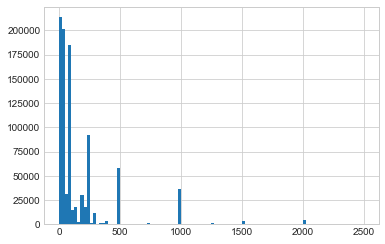

In [19]:
#2,500ドルまでの寄付額を取り出す
com_don = top_donor[top_donor < 2500]

#binを細かくして、キリのよい数字にピークがあるか見る
com_don.hist(bins=100)

キリのよい数字が多い

政党ごとに寄付額をまとめる。
まず候補者データに注目して、候補者の所属政党でデータを分類する。

In [26]:
#重複のない候補者のデータをつくる
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

新たにParty列を作る。候補者の所属政党データを保持する辞書を作り、DataFrameに追加する。

In [28]:
#所属政党の辞書
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

#DataFrame全体を更新
donor_df['Party'] = donor_df.cand_nm.map(party_map)

for文を使っても同じデータを作れるが、行数が多いためmapのほうが早い

In [29]:
'''
for i in xrange(0,len(donor_df)):
    if donor_df['cand_nm'][i] == 'Obama,Barack':
        donor_df['Party'][i] = 'Democrat'
    else:
        donor_df['Party'][i] = 'Republican'
'''

"\nfor i in xrange(0,len(donor_df)):\n    if donor_df['cand_nm'][i] == 'Obama,Barack':\n        donor_df['Party'][i] = 'Democrat'\n    else:\n        donor_df['Party'][i] = 'Republican'\n"

In [30]:
#払い戻しのデータを除く
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


候補者ごとに寄付額をまとめる。

In [32]:
#寄付の件数
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [33]:
#寄付の総額
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

In [37]:
#見にくいので整形する。
#データの準備
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

#indexアクセスのための変数を用意
i = 0

for don in cand_amount:
    print("{}　{:.0f}ドル\n".format(cand_amount.index[i], don))
    i += 1

Bachmann, Michelle　2711439ドル

Cain, Herman　7101082ドル

Gingrich, Newt　12832770ドル

Huntsman, Jon　3330373ドル

Johnson, Gary Earl　566962ドル

McCotter, Thaddeus G　39030ドル

Obama, Barack　135877427ドル

Paul, Ron　21009620ドル

Pawlenty, Timothy　6004819ドル

Perry, Rick　20305754ドル

Roemer, Charles E. 'Buddy' III　373010ドル

Romney, Mitt　88335908ドル

Santorum, Rick　11043159ドル



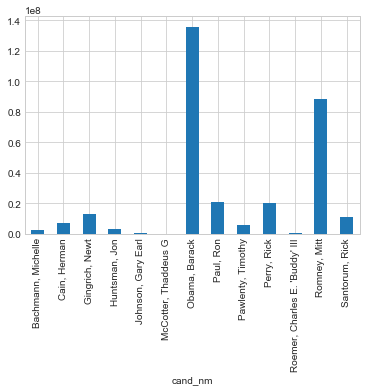

In [38]:
#棒グラフを描く
cand_amount.plot(kind = 'bar')

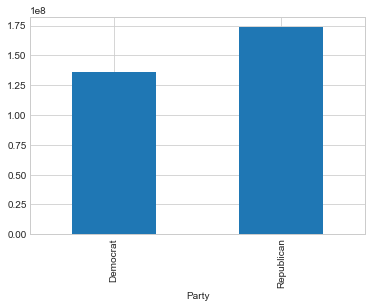

In [39]:
#政党別
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

In [41]:
#寄付した人の職業と政党でピボットテーブルを作り、寄付額を集計
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                                    index='contbr_occupation',
                                    columns='Party', aggfunc='sum')

In [43]:
occupation_df.head(10)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0
-,5000.0,2114.8


In [44]:
occupation_df.shape

(45067, 2)

In [45]:
#件数が多すぎるので、寄付金額が多いものだけにする
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [47]:
occupation_df.shape

(31, 2)

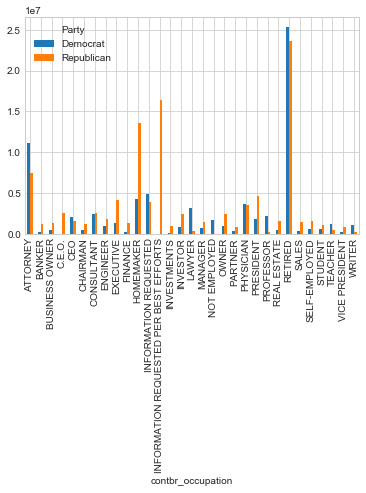

In [48]:
#グラフを描く
occupation_df.plot(kind='bar')

In [49]:
#無効な回答を取り除く
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS','INFORMATION REQUESTED'],axis=0,inplace=True)

In [50]:
#CEOとC.E.Oをまとめる
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']
#C.E.Oを消す
occupation_df.drop('C.E.O.',inplace=True)

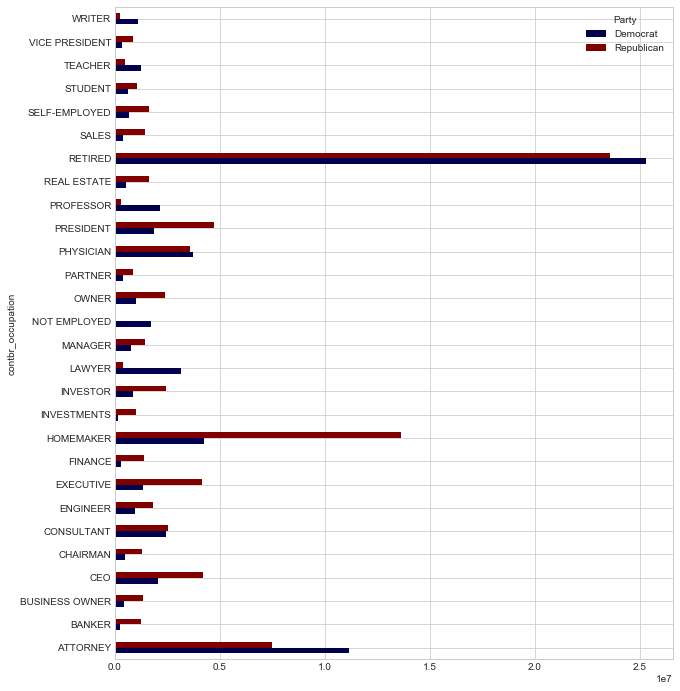

In [51]:
#再びプロット
#横にする
occupation_df.plot(kind='barh',figsize=(10,12),cmap='seismic')